In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hs_csv = pd.read_csv("BCM-activity-classification(2).csv")

# List the keys in the csv file
print(hs_csv.keys())

# Separate into 5 different dataframes
w1 = hs_csv[hs_csv['metadata/mfccs_pr_window (last)'] == 31] # 1 second window
w2 = hs_csv[hs_csv['metadata/mfccs_pr_window (last)'] == 62] # 2 second window
w3 = hs_csv[hs_csv['metadata/mfccs_pr_window (last)'] == 93] # 3 second window
w5 = hs_csv[hs_csv['metadata/mfccs_pr_window (last)'] == 156] # 5 second window
w8 = hs_csv[hs_csv['metadata/mfccs_pr_window (last)'] == 250] # 8 second window


Index(['Id', 'Creation Time', 'Owner', 'Monitoring Time', 'Tags',
       'training/val_acc_epoch (max)', 'training/train_acc_epoch (max)',
       'metadata/seed (last)', 'metadata/mfccs_pr_window (last)'],
      dtype='object')


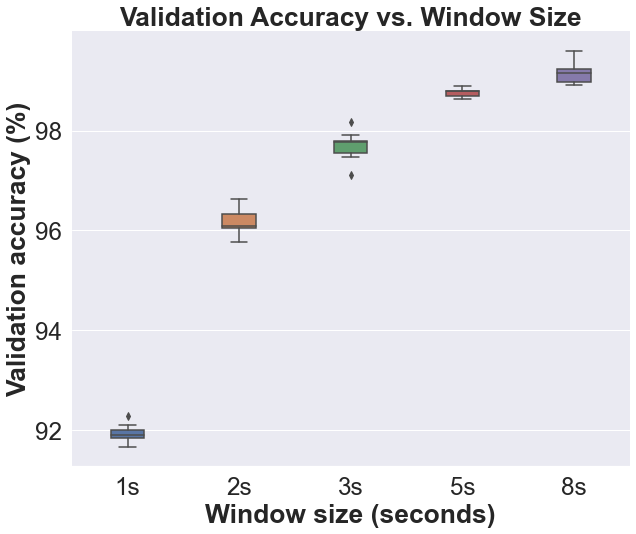

In [9]:
sns.set_theme(style="darkgrid", palette="deep")

# Plot the boxplot
# Set the figure size
plt.figure(figsize=(10, 8))
sns.set(font_scale=2.2)

# Create the boxplot
sns.boxplot([w1['training/val_acc_epoch (max)']*100, w2['training/val_acc_epoch (max)']*100, w3['training/val_acc_epoch (max)']*100, w5['training/val_acc_epoch (max)']*100, w8['training/val_acc_epoch (max)']*100], width=0.3)
sns.despine(left=True)

plt.xticks([0,1,2,3,4],['1s', '2s', '3s', '5s', '8s'])

# Add title and axis names
plt.title('Validation Accuracy vs. Window Size',fontweight="bold")
plt.xlabel('Window size (seconds)',fontweight="bold")
plt.ylabel('Validation accuracy (%)',fontweight="bold")



plt.savefig('window_size.png', dpi=300,bbox_inches='tight')

plt.show()



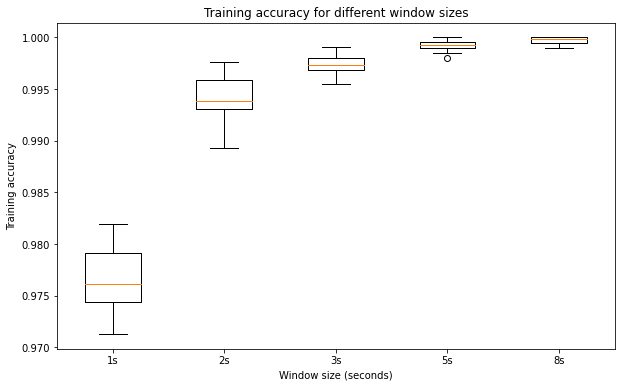

In [ ]:
# Make a boxplot of the training accuracy for different window sizes
plt.figure(figsize=(10, 6))
plt.boxplot([w1['training/train_acc_epoch (max)'], w2['training/train_acc_epoch (max)'], w3['training/train_acc_epoch (max)'], w5['training/train_acc_epoch (max)'], w8['training/train_acc_epoch (max)']], labels=['1s', '2s', '3s', '5s', '8s'])
plt.title('Training accuracy for different window sizes')
plt.xlabel('Window size (seconds)')
plt.ylabel('Training accuracy')
plt.xticks([1, 2, 3, 4, 5], ['1s', '2s', '3s', '5s', '8s'])
plt.show()